# Práctica 2
## Apartado 2: Segmentación

### Pilar Navarro Ramírez

## 1. Selección de los casos de estudio y preprocesamiento

Empezamos leyendo los datos a estudiar.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from pract2_utils import *
sns.set_style('whitegrid')

In [2]:
raw_data=pd.read_csv("accidentes_2013.csv",na_values=["?"])

In [3]:
raw_data.columns = [col.lower() for col in raw_data]

Ahora analizamos distintas variables y vemos si los valores de estas influyen en las víctimas de los accidentes de tráfico.

### Caso 1: Mes 

<AxesSubplot:xlabel='mes', ylabel='tot_victimas'>

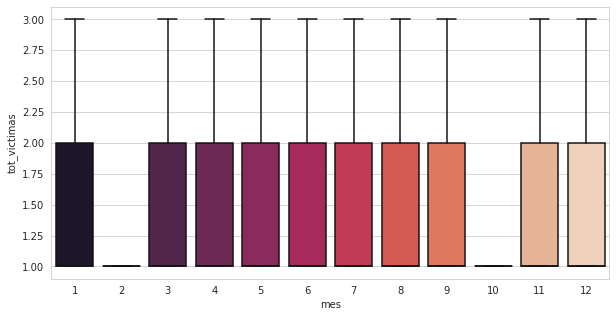

In [4]:
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(data=raw_data,y='tot_victimas',x='mes',palette='rocket',showfliers=False,ax=ax)

In [5]:
cols1=["mes","tot_heridos_leves","tot_heridos_graves","tot_victimas","tot_muertos"]
case1=raw_data[cols1]

In [6]:
tot1=case1.groupby('mes')
tot1=tot1.aggregate(np.mean)

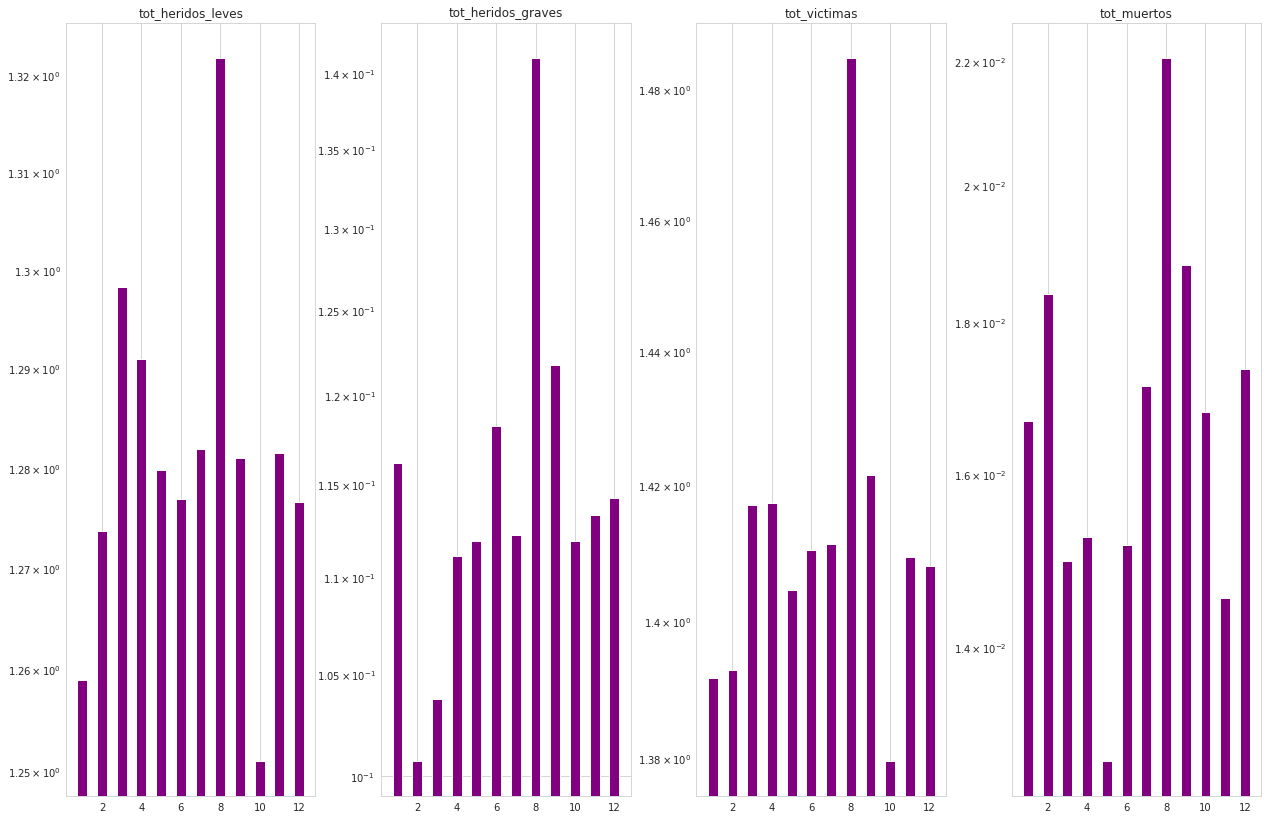

In [7]:
fig, axs= plt.subplots(1, 4,figsize=(18,12))
fig.tight_layout(pad=3.5)

for i in range(len(tot1.columns)):
        axs[i].bar(tot1.index,tot1[tot1.columns[i]],width=0.5,color='purple',log=True)
        axs[i].set_title(tot1.columns[i])
        
plt.savefig('influencia_mes.png',dpi=300,bbox_inches='tight')

### Caso 2: Luminosidad

<AxesSubplot:xlabel='luminosidad', ylabel='tot_victimas'>

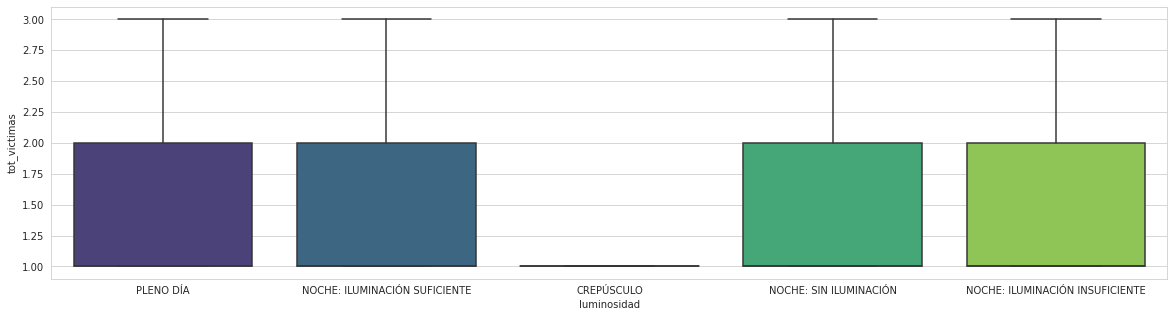

In [8]:
fig, ax= plt.subplots(figsize=(20,5))
sns.boxplot(data=raw_data,y='tot_victimas',x='luminosidad',palette='viridis',showfliers=False,ax=ax)

In [9]:
cols3=["luminosidad","tot_heridos_leves","tot_heridos_graves","tot_victimas","tot_muertos"]
case3=raw_data[cols3]

In [10]:
tot3=case3.groupby('luminosidad')
tot3=tot3.aggregate(np.mean)
tot3.index=["crepusculo","noche:insuficiente","noche:suficiente","noche:no ilum.","pleno día"]

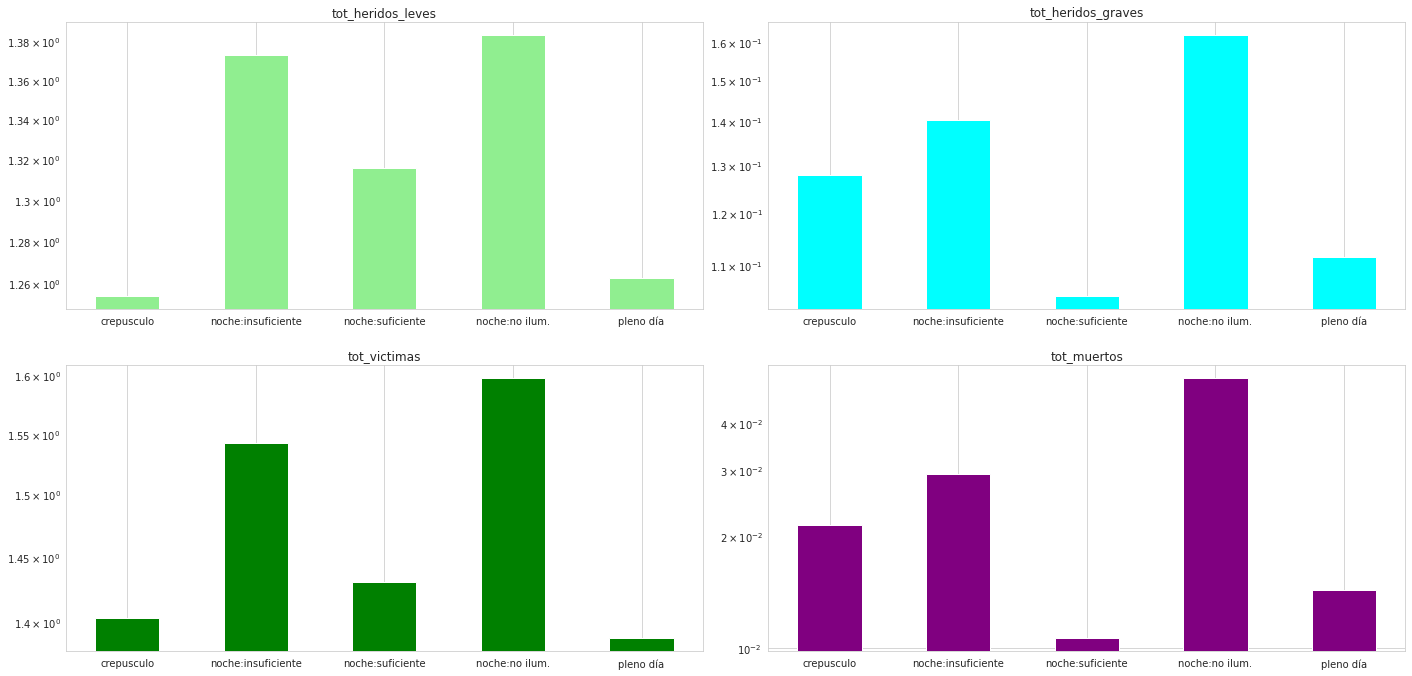

In [11]:
fig, axs= plt.subplots(2, 2,figsize=(20,10))
fig.tight_layout(pad=3.5)


axs[0,0].bar(tot3.index,tot3[tot3.columns[0]],width=0.5,color='lightgreen',log=True)
axs[0,0].set_title(tot3.columns[0])
axs[0,1].bar(tot3.index,tot3[tot3.columns[1]],width=0.5,color='aqua',log=True)
axs[0,1].set_title(tot3.columns[1])
axs[1,0].bar(tot3.index,tot3[tot3.columns[2]],width=0.5,color='green',log=True)
axs[1,0].set_title(tot3.columns[2])
axs[1,1].bar(tot3.index,tot3[tot3.columns[3]],width=0.5,color='purple',log=True)
axs[1,1].set_title(tot3.columns[3])
        
plt.savefig('influencia_luminosidad.png',dpi=300,bbox_inches='tight')

### Caso 3: Estado de la superficie de la calzada

<AxesSubplot:xlabel='superficie_calzada', ylabel='tot_victimas'>

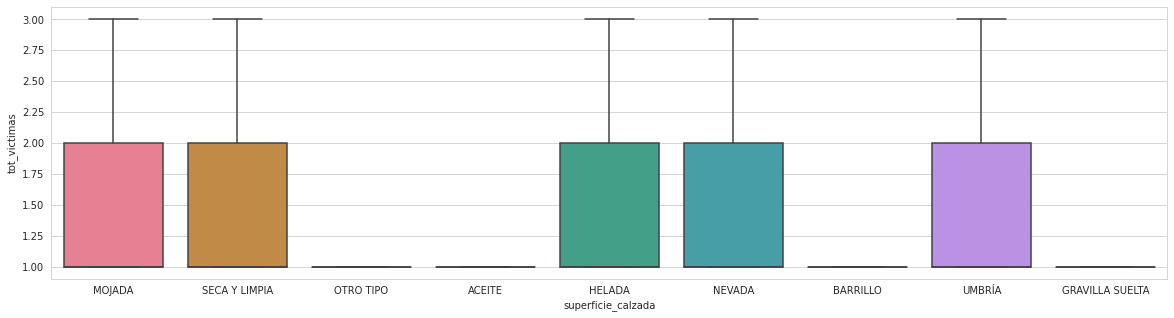

In [12]:
fig, ax =plt.subplots(figsize=(20,5))
sns.boxplot(data=raw_data,y='tot_victimas',x='superficie_calzada',palette='husl',showfliers=False,ax=ax)

In [13]:
cols4=["superficie_calzada","tot_heridos_leves","tot_heridos_graves","tot_victimas","tot_muertos"]
case4=raw_data[cols4]
tot4=case4.groupby('superficie_calzada')
tot4=tot4.aggregate(np.mean)
tot4.index =[row.lower() for row in tot4.index]

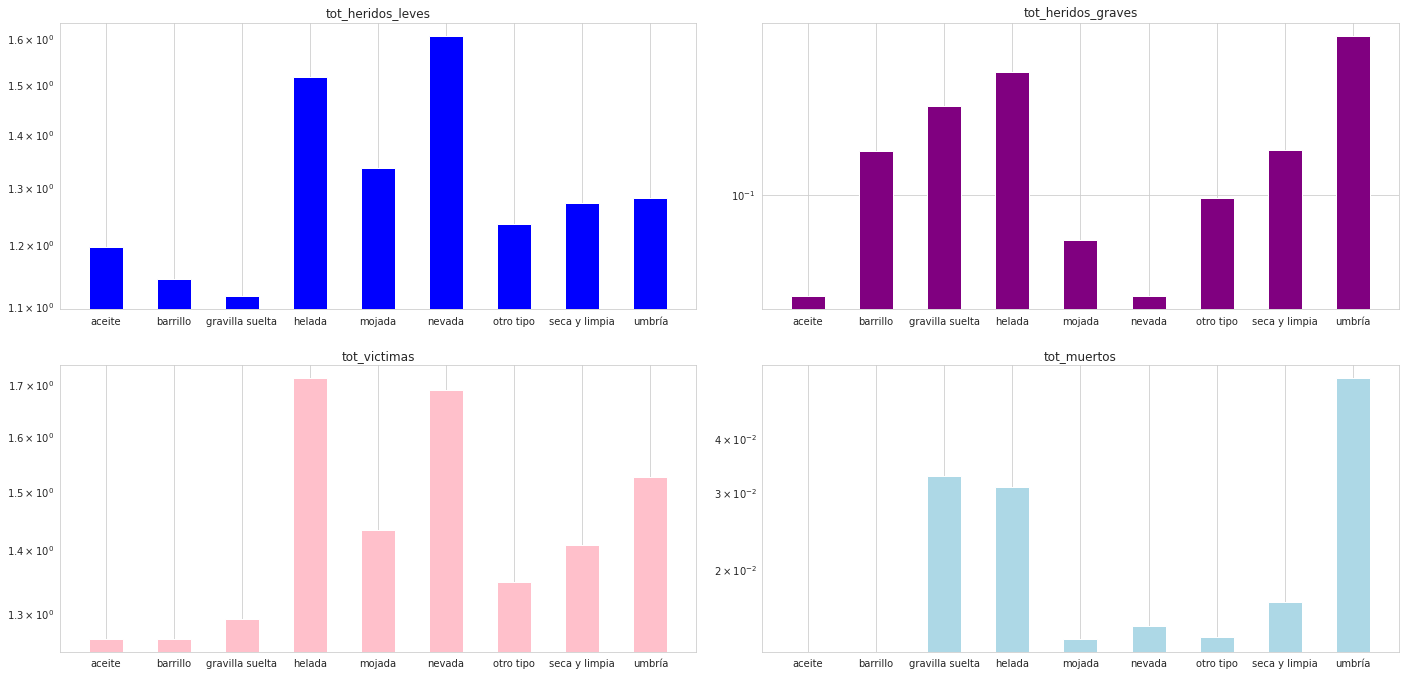

In [14]:
fig, axs= plt.subplots(2, 2,figsize=(20,10))
fig.tight_layout(pad=3.5)

axs[0,0].bar(tot4.index,tot4[tot4.columns[0]],width=0.5,color='blue',log=True)
axs[0,0].set_title(tot4.columns[0])
axs[0,1].bar(tot4.index,tot4[tot4.columns[1]],width=0.5,color='purple',log=True)
axs[0,1].set_title(tot4.columns[1])
axs[1,0].bar(tot4.index,tot4[tot4.columns[2]],width=0.5,color='pink',log=True)
axs[1,0].set_title(tot4.columns[2])
axs[1,1].bar(tot4.index,tot4[tot4.columns[3]],width=0.5,color='lightblue',log=True)
axs[1,1].set_title(tot4.columns[3])
        
plt.savefig('influencia_calzada.png',dpi=300,bbox_inches='tight')

### Selección de datos

Nos quedamos ahora con las instancias relevantes de acuerdo a dos casos de estudio y con los atributos numéricos  de interés asociados a dichas instancias.

In [5]:
#Atributos numéricos que nos interesan
cols=["tot_heridos_leves","tot_heridos_graves","tot_victimas","tot_muertos","tot_vehiculos_implicados"]

**Caso 1: Meses de julio, agosto y septiembre**

In [6]:
caso1=raw_data[((raw_data.mes == 7) | (raw_data.mes == 8) | (raw_data.mes == 9))]
caso1=caso1[cols]
caso1.head(10)

,tot_heridos_leves,tot_heridos_graves,tot_victimas,tot_muertos,tot_vehiculos_implicados
0,0,3,3,0,2
6,2,0,2,0,2
9,1,0,1,0,3
11,2,0,2,0,2
14,1,0,1,0,2
16,1,0,1,0,2
19,1,0,1,0,2
20,2,0,2,0,2
21,2,0,2,0,1
23,1,0,1,0,2


In [7]:
caso1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22930 entries, 0 to 89503
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   tot_heridos_leves         22930 non-null  int64
 1   tot_heridos_graves        22930 non-null  int64
 2   tot_victimas              22930 non-null  int64
 3   tot_muertos               22930 non-null  int64
 4   tot_vehiculos_implicados  22930 non-null  int64
dtypes: int64(5)
memory usage: 1.0 MB


Y observamos que no hay valores nulos. 

Convertimos el DataFrame en una matriz y normalizamos los datos para poder aplicar correctamente las distancias entre ellos.

In [8]:
data_caso1 = to_matrix(caso1, cols)
data_caso1 = norm(data_caso1)
data_caso1[:5]

array([[0.        , 0.3       , 0.06666667, 0.        , 0.22222222],
       [0.14285714, 0.        , 0.03333333, 0.        , 0.22222222],
       [0.07142857, 0.        , 0.        , 0.        , 0.33333333],
       [0.14285714, 0.        , 0.03333333, 0.        , 0.22222222],
       [0.07142857, 0.        , 0.        , 0.        , 0.22222222]])

**Caso 2: Noches con poca iluminación y calzada mojada, nevada o helada**

In [9]:
caso2=raw_data[((raw_data.superficie_calzada == "NEVADA") | (raw_data.superficie_calzada == "MOJADA") | (raw_data.superficie_calzada == "HELADA")) & ((raw_data.luminosidad == "NOCHE: ILUMINACIÓN INSUFICIENTE") | (raw_data.luminosidad == "NOCHE: SIN ILUMINACIÓN"))]
caso2=caso2[cols]
caso2.head(10)

,tot_heridos_leves,tot_heridos_graves,tot_victimas,tot_muertos,tot_vehiculos_implicados
21,2,0,2,0,1
57,0,0,1,1,2
96,1,0,1,0,1
104,1,0,1,0,2
117,1,0,1,0,1
132,3,0,3,0,2
149,1,0,1,0,1
256,1,1,2,0,3
305,2,0,2,0,3
359,2,0,2,0,1


In [10]:
caso2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 21 to 89020
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   tot_heridos_leves         1851 non-null   int64
 1   tot_heridos_graves        1851 non-null   int64
 2   tot_victimas              1851 non-null   int64
 3   tot_muertos               1851 non-null   int64
 4   tot_vehiculos_implicados  1851 non-null   int64
dtypes: int64(5)
memory usage: 86.8 KB


Transformamos los datos a una matriz y los normalizamos en (0,1)

In [11]:
data_caso2 = to_matrix(caso2, cols)
data_caso2 = norm(data_caso2)
data_caso2[:5]

array([[0.28571429, 0.        , 0.16666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.1       ],
       [0.14285714, 0.        , 0.        , 0.        , 0.        ],
       [0.14285714, 0.        , 0.        , 0.        , 0.1       ],
       [0.14285714, 0.        , 0.        , 0.        , 0.        ]])

**Caso 3: Iluminación suficiente y calzada mojada, nevada o helada**

In [77]:
caso3=raw_data[((raw_data.superficie_calzada == "NEVADA") | (raw_data.superficie_calzada == "MOJADA") | (raw_data.superficie_calzada == "HELADA")) & ((raw_data.luminosidad != "NOCHE: ILUMINACIÓN INSUFICIENTE") & (raw_data.luminosidad != "NOCHE: SIN ILUMINACIÓN"))]
caso3=caso3[cols]
caso3.head(10)

,tot_heridos_leves,tot_heridos_graves,tot_victimas,tot_muertos,tot_vehiculos_implicados
0,0,3,3,0,2
1,1,0,1,0,3
3,2,0,2,0,3
4,2,0,2,0,2
24,0,1,1,0,1
26,3,0,3,0,2
30,1,0,1,0,1
34,1,0,1,0,1
37,1,0,1,0,1
39,1,0,1,0,1


In [78]:
caso3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10901 entries, 0 to 89513
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   tot_heridos_leves         10901 non-null  int64
 1   tot_heridos_graves        10901 non-null  int64
 2   tot_victimas              10901 non-null  int64
 3   tot_muertos               10901 non-null  int64
 4   tot_vehiculos_implicados  10901 non-null  int64
dtypes: int64(5)
memory usage: 511.0 KB


In [79]:
data_caso3 = to_matrix(caso3, cols)
data_caso3 = norm(data_caso3)
data_caso3[:5]

array([[0.        , 0.5       , 0.08      , 0.        , 0.02272727],
       [0.04761905, 0.        , 0.        , 0.        , 0.04545455],
       [0.0952381 , 0.        , 0.04      , 0.        , 0.04545455],
       [0.0952381 , 0.        , 0.04      , 0.        , 0.02272727],
       [0.        , 0.16666667, 0.        , 0.        , 0.        ]])

## 2. Aplicación de los algoritmos de clustering

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

### K-means

In [13]:
def calcular_k_elbow(data,k_max):
    distortions=[] 
    for i in range(2,k_max):
        kmeans = KMeans(n_clusters= i, random_state=200).fit(data)
        distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / data.shape[0])
        
    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,k_max), distortions)
    ax.set_title('The Elbow Method')
    ax.set_xlabel('Número de clusters')
    ax.set_ylabel('Distortions')
    plt.show()
    
def k_means(data,k):
    kmeans = KMeans(n_clusters= k, random_state=200).fit(data)
    
    silhouette, calinski = measures_silhoutte_calinski(data, kmeans.labels_)
    
    print("Silhouette: {:3f}".format(silhouette))
    print("Calinsky: {:3f}".format(calinski))
    
    return kmeans

In [14]:
 def calcular_k_SC(data,k_max):
    costs=[[] for i in range(2)] 
    for i in range(2,k_max):
        resultado = KMeans(n_clusters= i, random_state=150).fit(data)
        
        silhouette, calinski = measures_silhoutte_calinski(data, resultado.labels_)
    
        costs[0].append(silhouette)
        costs[1].append(calinski)
        
    fig, (ax1, ax2) =plt.subplots(1,2,figsize=(15,5))
    ax1.plot(range(2,k_max), costs[0])
    ax1.set_xlabel('Número de clusters')
    ax1.set_ylabel('Silhouette')
    
    ax2.plot(range(2,k_max), costs[1])
    ax2.set_xlabel('Número de clusters')
    ax2.set_ylabel('Calinski')
    plt.show()

In [66]:
#Función para visualizar los diagramas de cajas de las variables asociados a cada cluster
#el parámetro outliers toma el valor True para que estos aparezcan en los diagramas y False en caso contrario
def boxplot_clusters(data,outliers):

    fig, axs= plt.subplots(2,3 ,figsize=(18,12))
    fig.tight_layout(pad=3.5)

    sns.boxplot(data=data,y=data[data.columns[0]],x='labels',showfliers=outliers,palette='husl',ax=axs[0,0])
    sns.boxplot(data=data,y=data[data.columns[1]],x='labels',showfliers=outliers,palette='husl',ax=axs[0,1])
    sns.boxplot(data=data,y=data[data.columns[2]],x='labels',showfliers=outliers,palette='husl',ax=axs[0,2])
    sns.boxplot(data=data,y=data[data.columns[3]],x='labels',showfliers=outliers,palette='husl',ax=axs[1,0])
    sns.boxplot(data=data,y=data[data.columns[4]],x='labels',showfliers=outliers,palette='husl',ax=axs[1,1])
    plt.savefig('cajas_cluster.png',dpi=300,bbox_inches='tight')

**Caso 1**

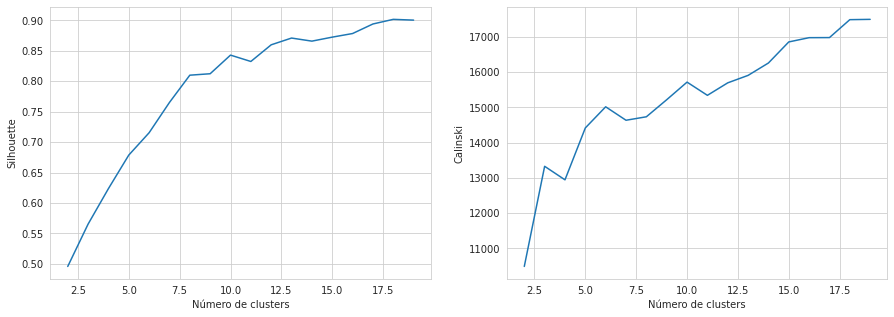

In [176]:
calcular_k_SC(data_caso1,20)

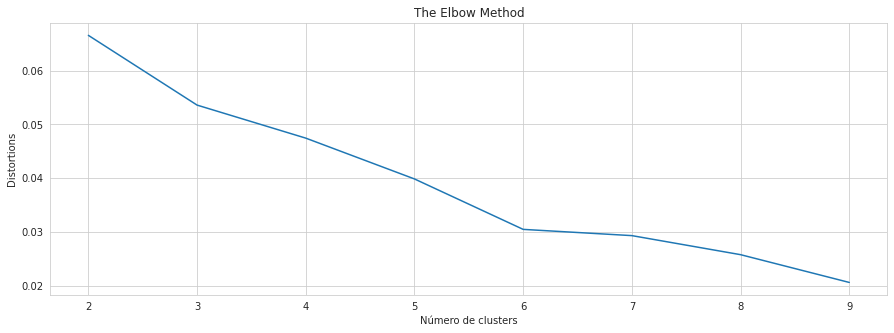

In [126]:
calcular_k_elbow(data_caso1,10)

In [127]:
result1=k_means(data_caso1,6)

Silhouette: 0.735084
Calinsky: 15017.276290


/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


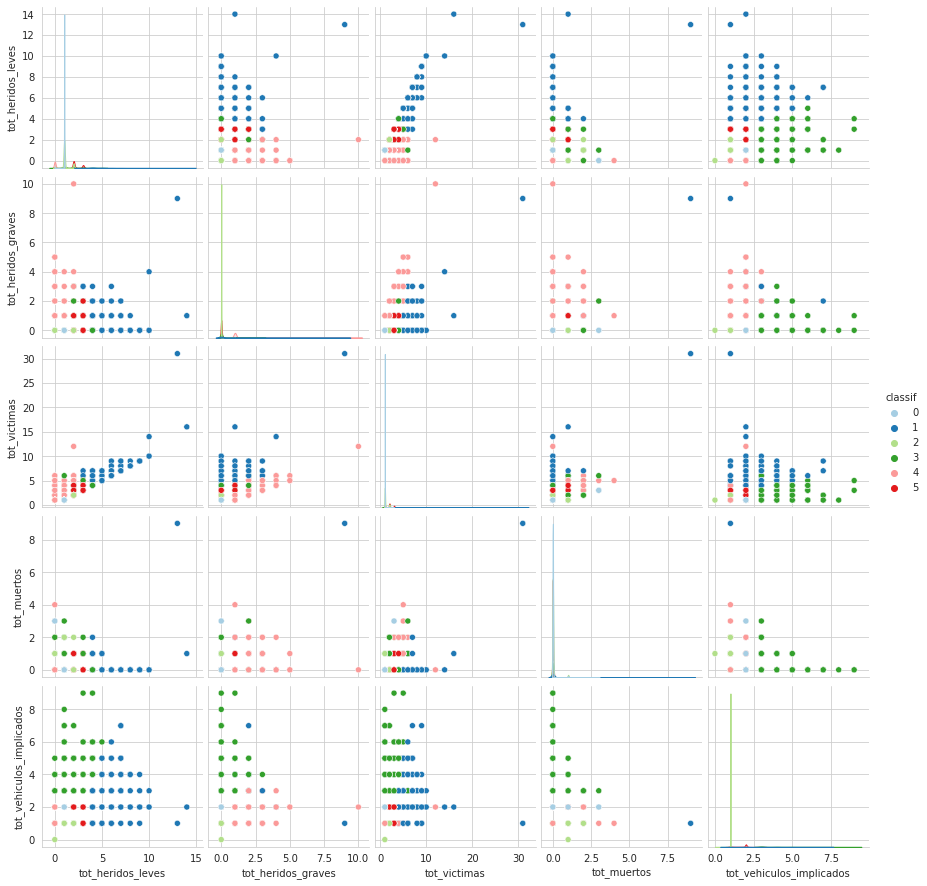

In [177]:
pairplot(caso1, caso1.columns, result1.labels_)

<AxesSubplot:>

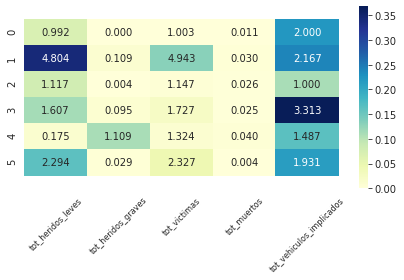

In [178]:
visualize_centroids(result1.cluster_centers_, np.array(caso1), caso1.columns)

<AxesSubplot:xlabel='labels', ylabel='count'>

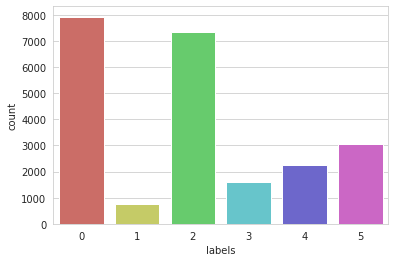

In [130]:
clusters1=caso1.copy()
clusters1['labels']=result1.labels_
sns.countplot(data=clusters1, x='labels',palette="hls")

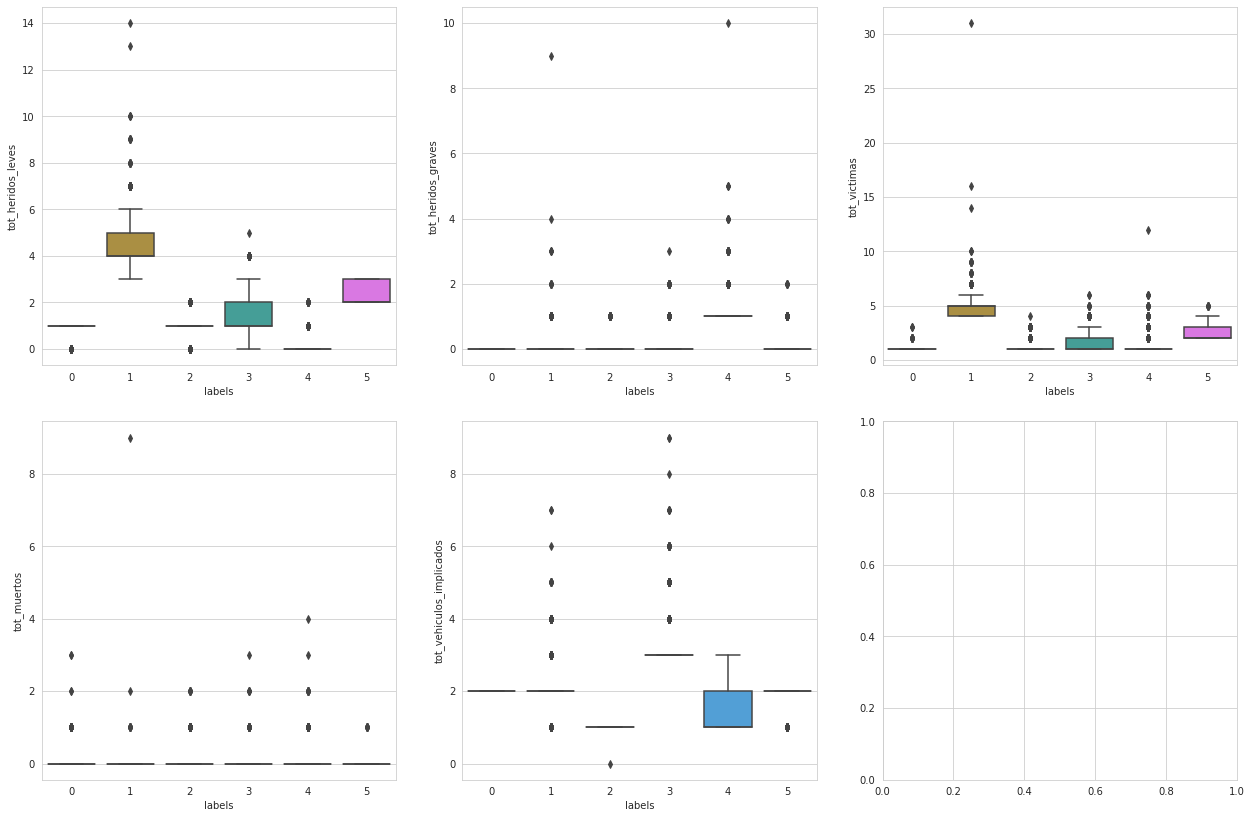

In [131]:
boxplot_clusters(clusters1,True)

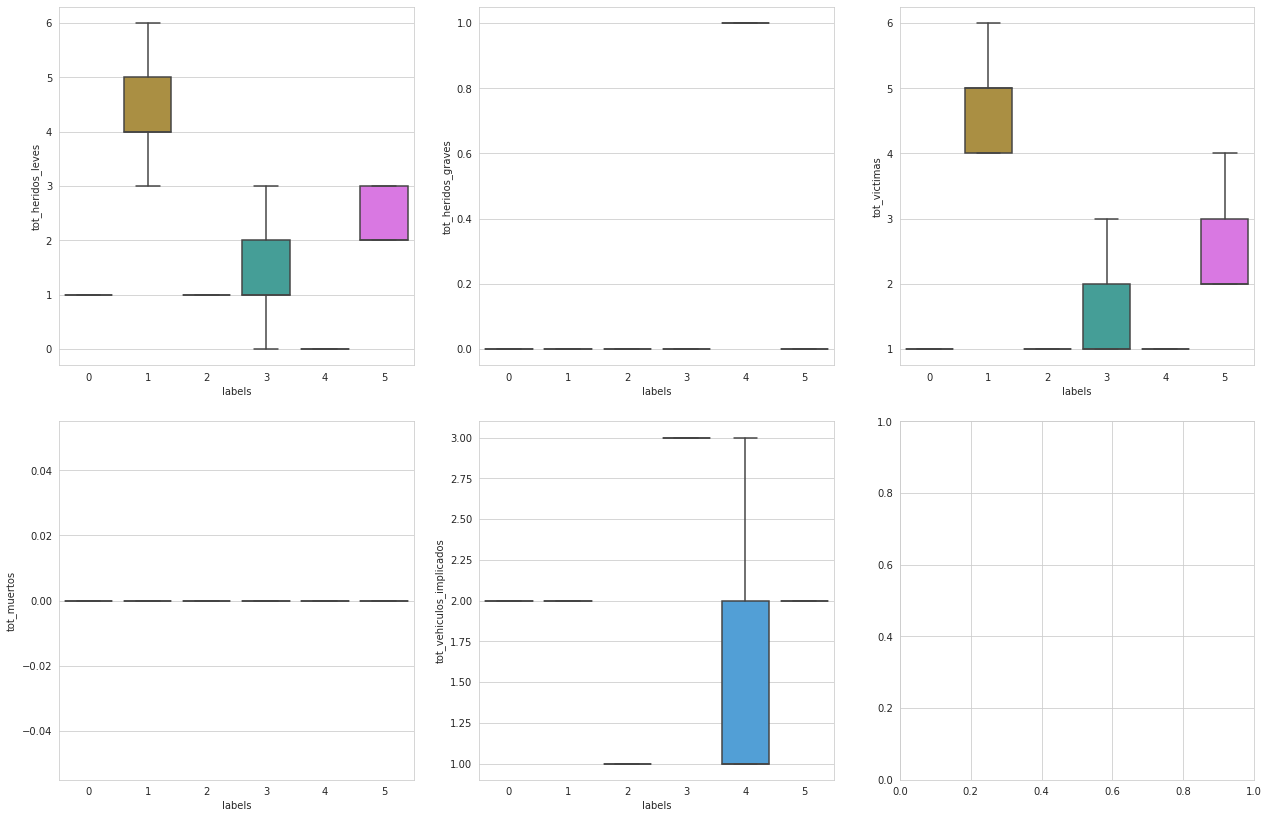

In [183]:
boxplot_clusters(clusters1,False)

**Caso2**

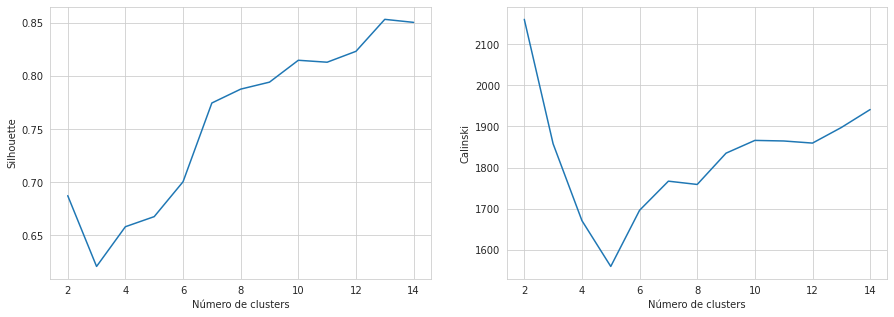

In [133]:
calcular_k_SC(data_caso2,15)

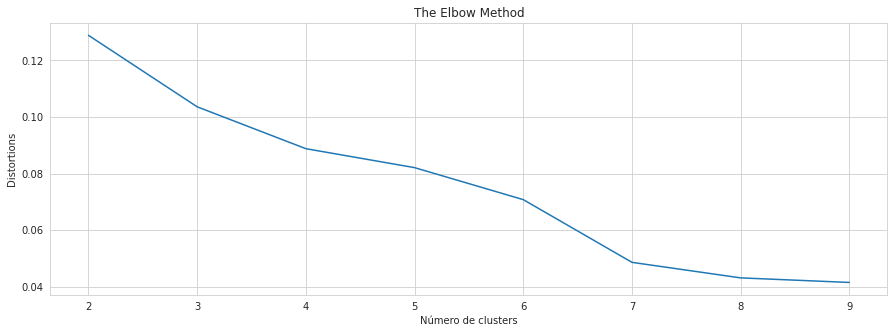

In [36]:
calcular_k_elbow(data_caso2,10)

In [55]:
result2=k_means(data_caso2,7)

Silhouette: 0.773931
Calinsky: 1764.636919


/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping de

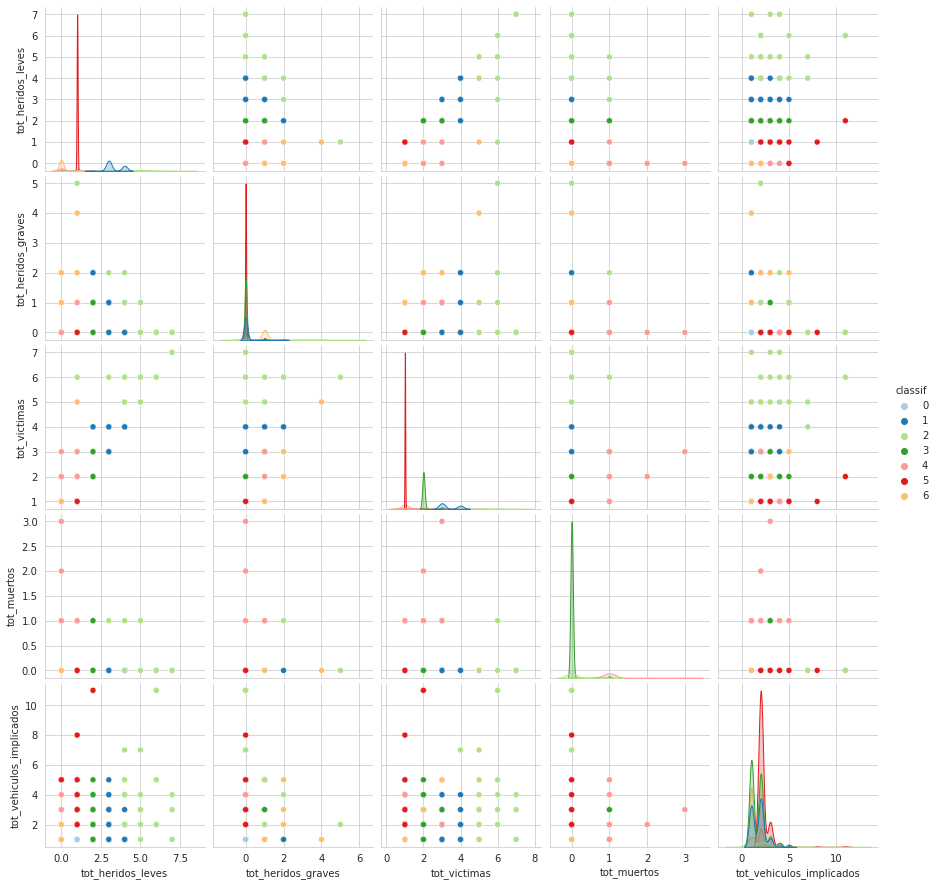

In [38]:
pairplot(caso2, caso2.columns, result2.labels_)

<AxesSubplot:>

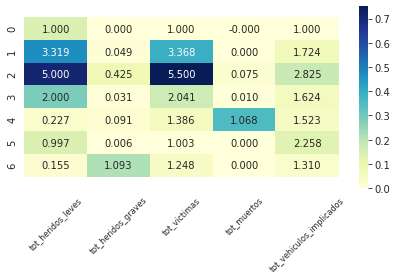

In [186]:
visualize_centroids(result2.cluster_centers_ ,np.array(caso2), caso2.columns)

<AxesSubplot:xlabel='labels', ylabel='count'>

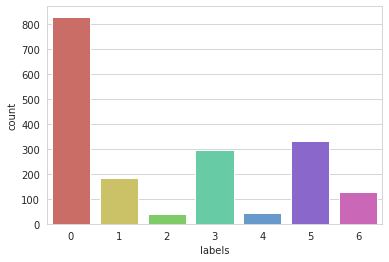

In [56]:
clusters2=caso2.copy()
clusters2['labels']=result2.labels_
sns.countplot(data=clusters2, x='labels',palette="hls")

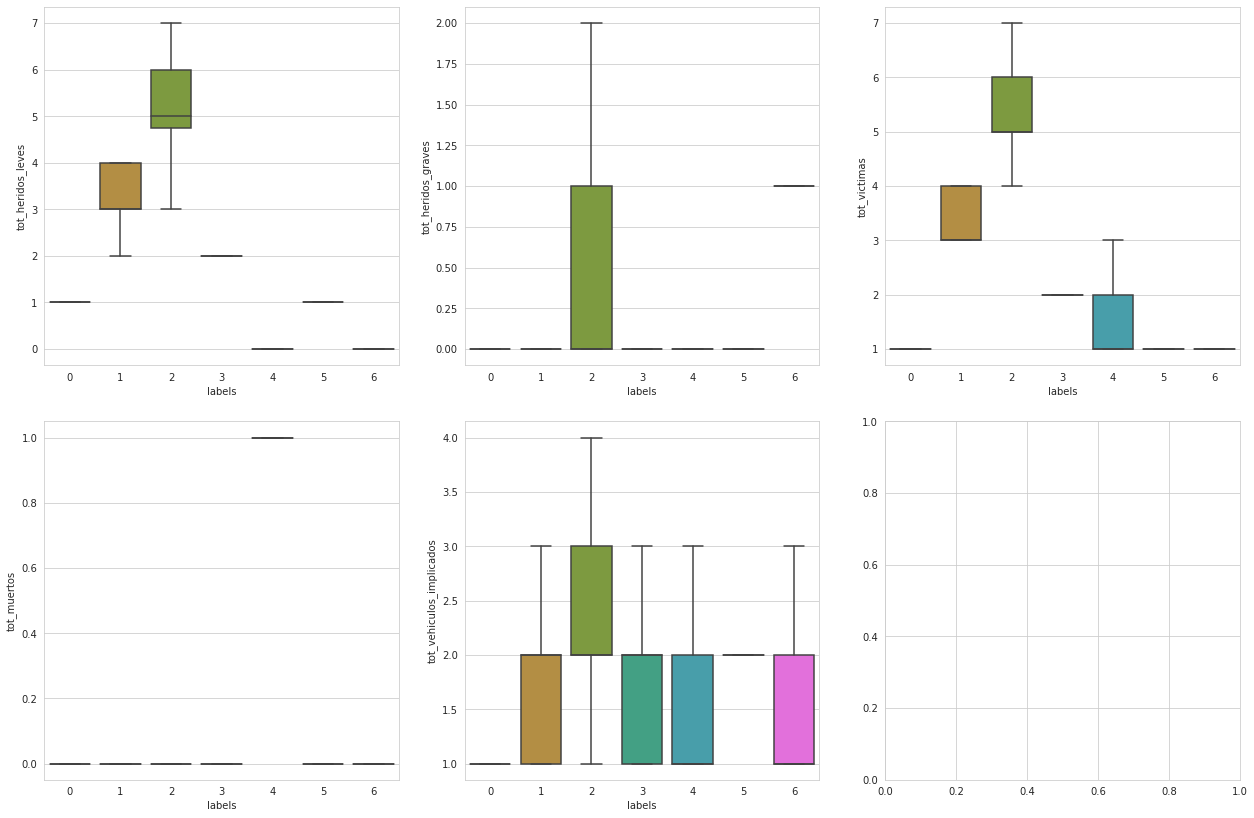

In [188]:
boxplot_clusters(clusters2,False)

**Caso 3**

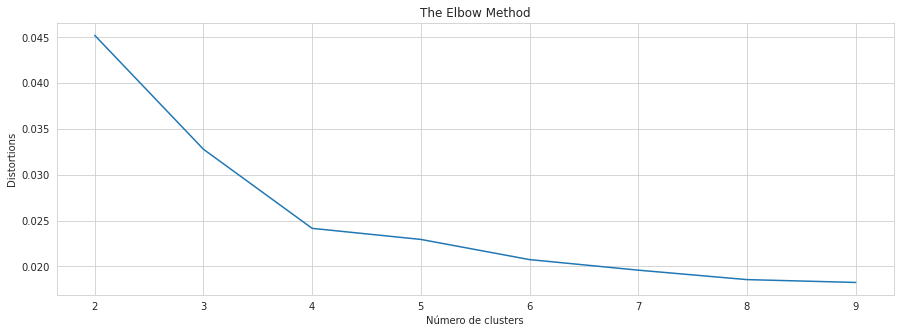

In [80]:
calcular_k_elbow(data_caso3,10)

In [81]:
result3=k_means(data_caso3,4)

Silhouette: 0.718011
Calinsky: 7644.620592


/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


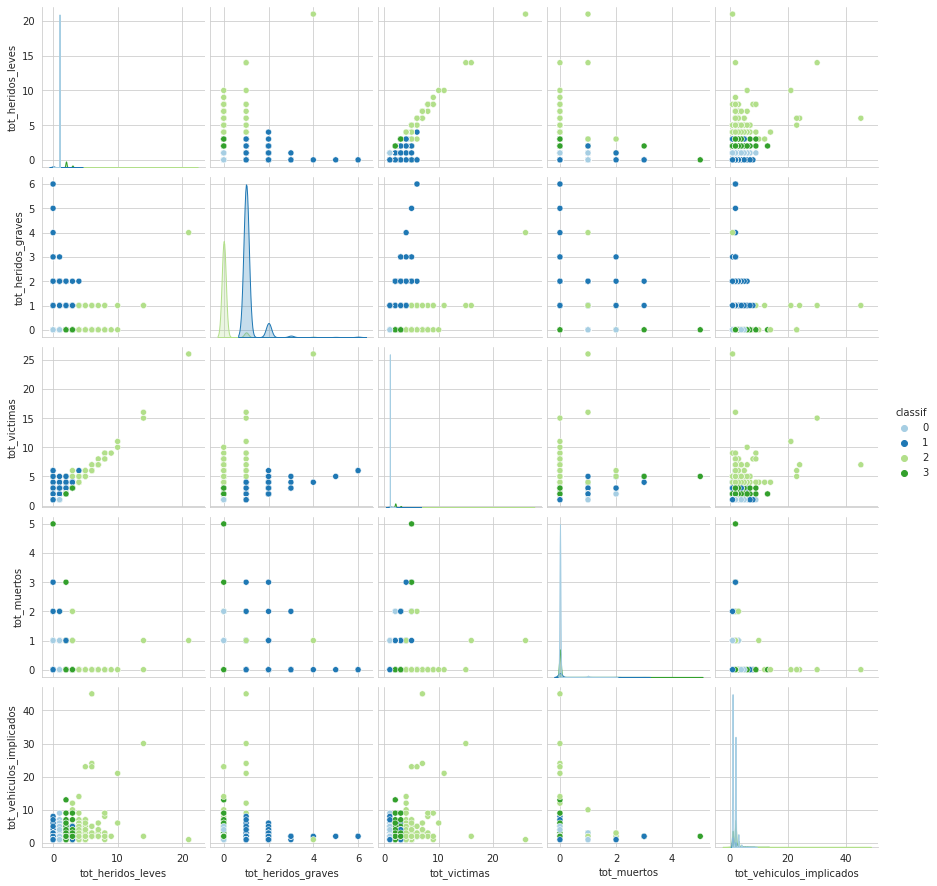

In [85]:
pairplot(caso3, caso3.columns, result3.labels_)

<AxesSubplot:>

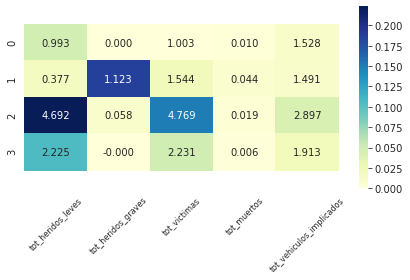

In [82]:
visualize_centroids(result3.cluster_centers_ ,np.array(caso3), caso3.columns)

<AxesSubplot:xlabel='labels', ylabel='count'>

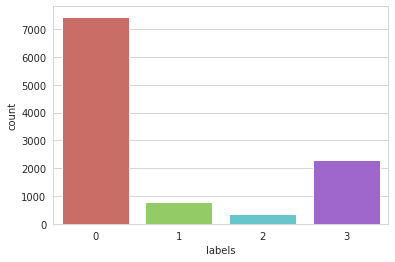

In [83]:
clusters3=caso3.copy()
clusters3['labels']=result3.labels_
sns.countplot(data=clusters3, x='labels',palette="hls")

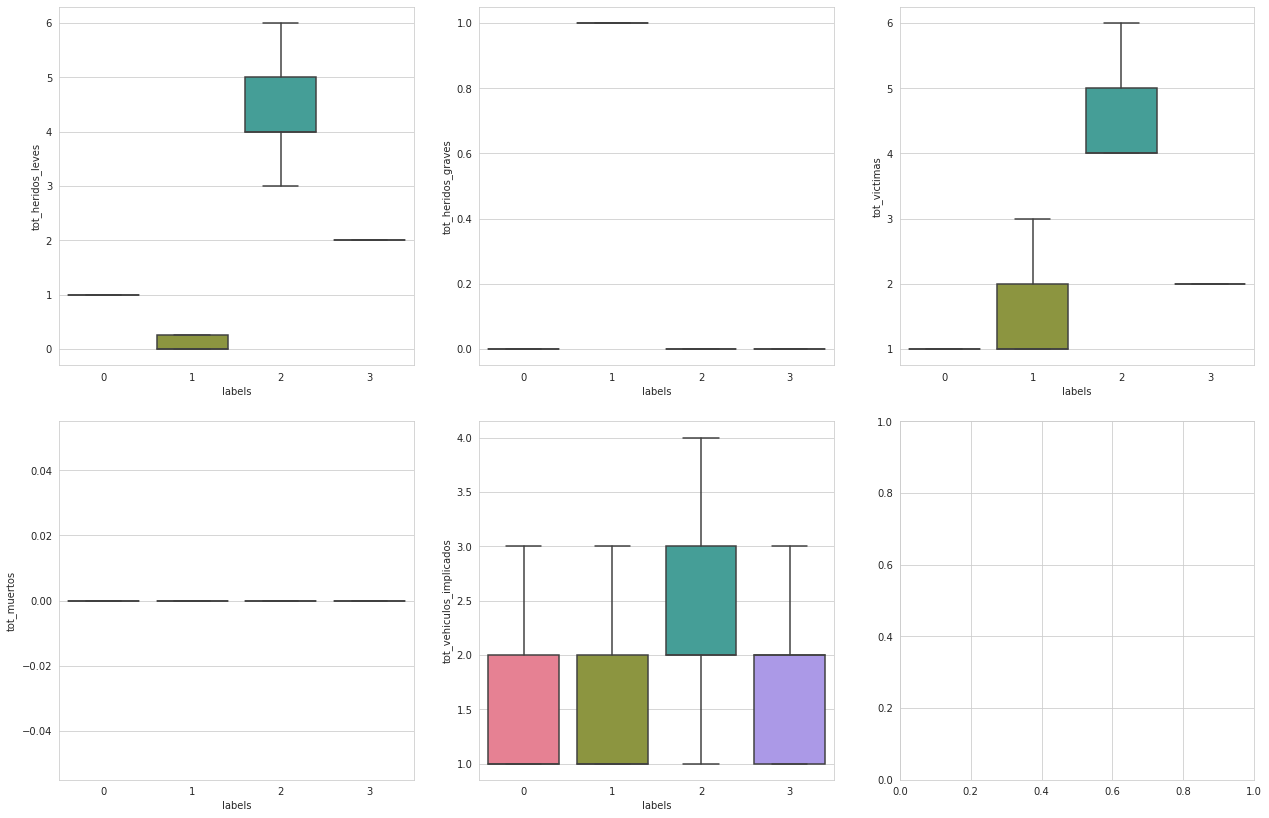

In [84]:
boxplot_clusters(clusters3,False)

### Agglomerative Clustering

Usamos este algoritmo de clustering jerárquico para estudiar el caso 1.

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [13]:
def calcular_k_hierarchical(data,k_max):
    distortions=[] 
    for i in range(2,k_max):
        resultado = AgglomerativeClustering(n_clusters= i).fit(data)
        
        #Calcular los centros
        centros=pd.DataFrame(data)
        centros['labels']=resultado.labels_
        centros=np.array(centros.groupby('labels').mean())
        distortions.append(sum(np.min(cdist(data, centros, 
                      'euclidean'),axis=1)) / data.shape[0])
        
    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,k_max), distortions)
    ax.set_title('The Elbow Method')
    ax.set_xlabel('Número de clusters')
    ax.set_ylabel('Distortions')
    plt.show()
    
def agglomerative(data,k):
    resultado = AgglomerativeClustering(n_clusters= k).fit(data)
    
    silhouette, calinski = measures_silhoutte_calinski(data, resultado.labels_)
    
    print("Silhouette: {:3f}".format(silhouette))
    print("Calinsky: {:3f}".format(calinski))
       
    
    return resultado

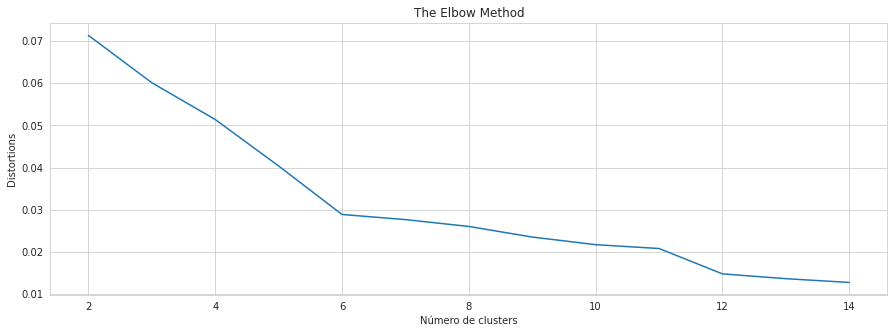

In [142]:
calcular_k_hierarchical(data_caso1,15)

In [14]:
resultado_agg=agglomerative(data_caso1,6)

Silhouette: 0.730737
Calinsky: 12399.641611


/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping de

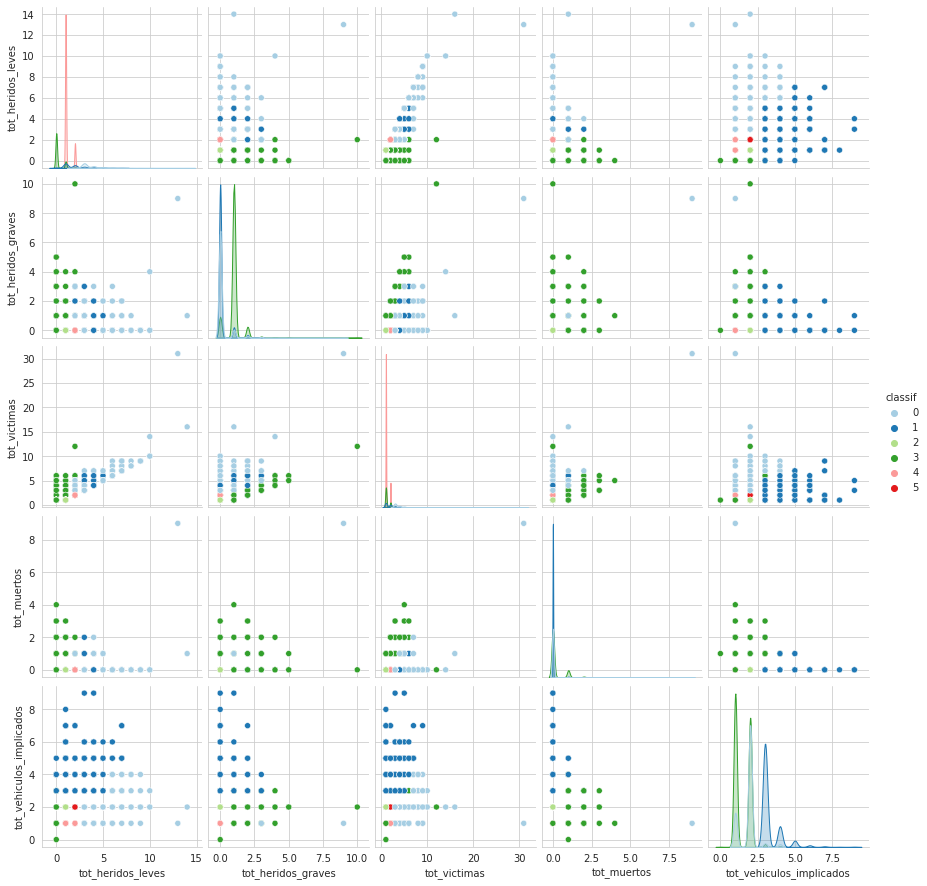

In [19]:
pairplot(caso1, caso1.columns, resultado_agg.labels_)

In [15]:
clusters_agg=pd.DataFrame(data_caso1)
clusters_agg.columns=caso1.columns
clusters_agg['labels']=resultado_agg.labels_
centros=np.array(clusters_agg.groupby('labels').mean())

<AxesSubplot:>

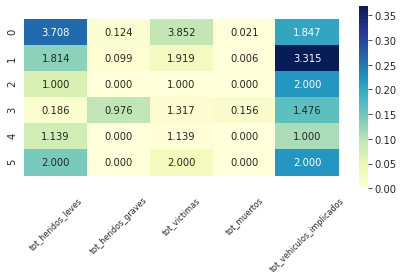

In [171]:
visualize_centroids(centros,np.array(caso1), caso1.columns)

<AxesSubplot:xlabel='labels', ylabel='count'>

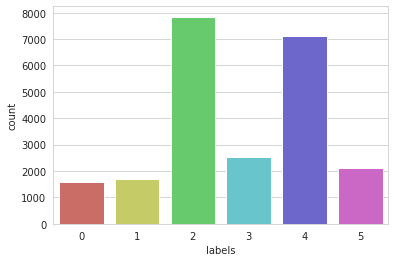

In [173]:
sns.countplot(data=clusters_agg, x='labels',palette='hls')

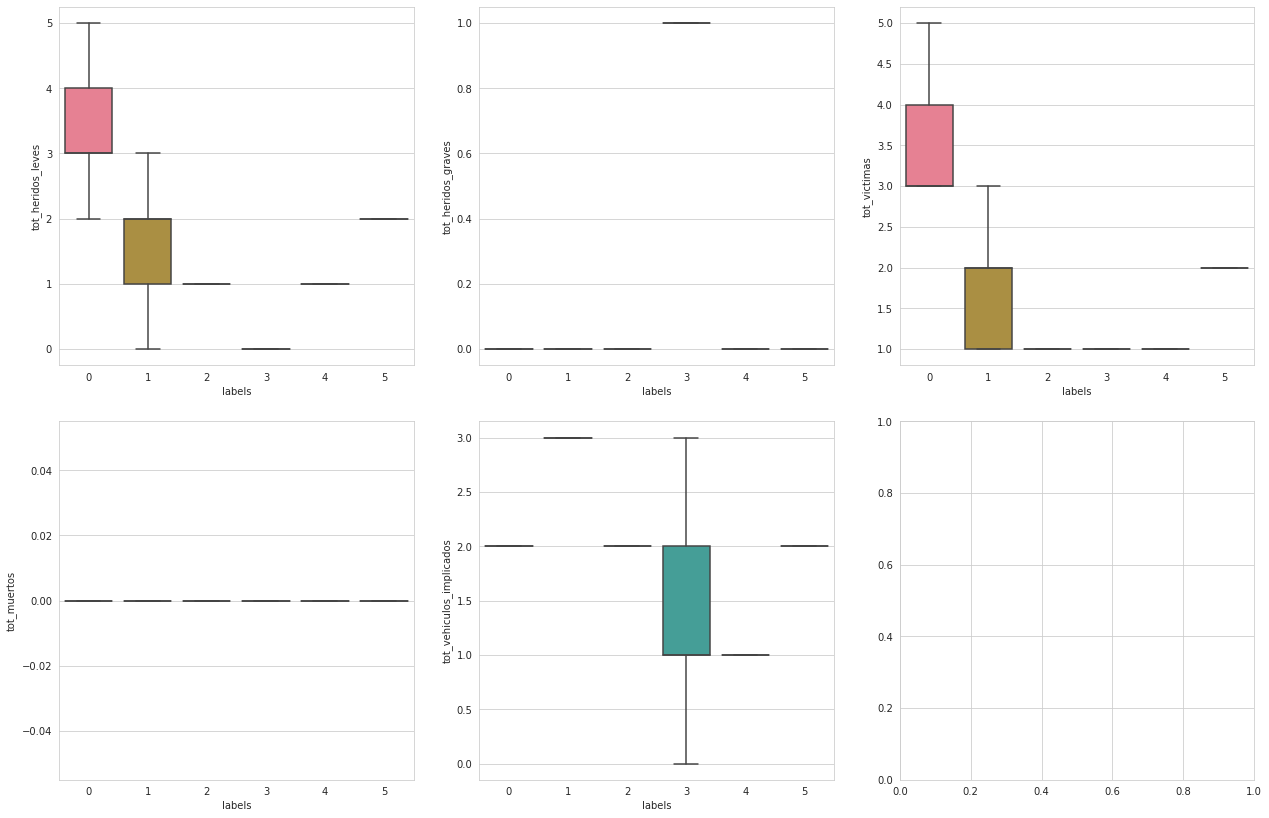

In [18]:
clusters_agg=caso1.copy()
clusters_agg['labels']=resultado_agg.labels_
boxplot_clusters(clusters_agg,False)

### DBSCAN

Aplicamos ahora el algoritmo DBSCAN para analizar el caso 2.

In [16]:
from sklearn.cluster import DBSCAN

In [63]:
def calcular_eps(data,num,eps_min,eps_max):
    costs=[[] for i in range(2)] 
    for n in np.linspace(eps_min, eps_max, num=num):
        resultado = DBSCAN(min_samples=6,eps=n).fit(data)
        
        silhouette, calinski = measures_silhoutte_calinski(data, resultado.labels_)
    
        costs[0].append(silhouette)
        costs[1].append(calinski)
        
    fig, (ax1, ax2) =plt.subplots(1,2,figsize=(15,5))
    ax1.plot(np.linspace(eps_min, eps_max, num=num), costs[0])
    ax1.set_xlabel('eps')
    ax1.set_ylabel('Silhouette')
    
    ax2.plot(np.linspace(eps_min, eps_max, num=num), costs[1])
    ax2.set_xlabel('eps')
    ax2.set_ylabel('Calinski')
    plt.show()
    
def dbscan(data,n):
    resultado = DBSCAN(min_samples=6,eps=n).fit(data)
    
    silhouette, calinski = measures_silhoutte_calinski(data, resultado.labels_)
    
    print("Silhouette: {:3f}".format(silhouette))
    print("Calinsky: {:3f}".format(calinski))
       
    
    return resultado

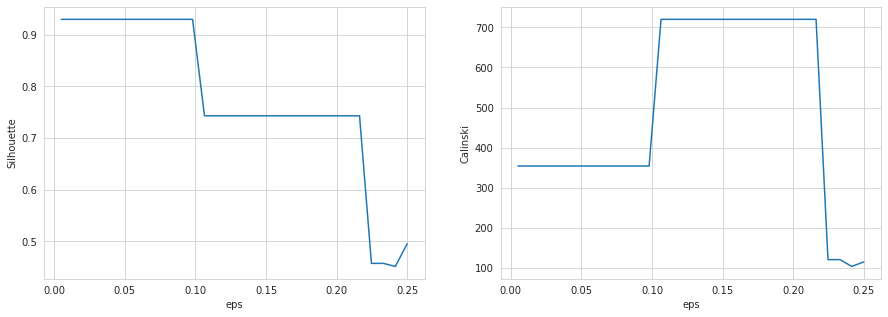

In [18]:
calcular_eps(data_caso2,30,0.005,0.25)

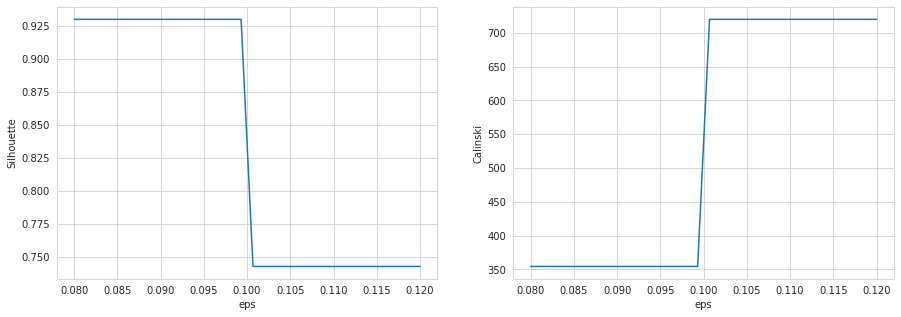

In [19]:
calcular_eps(data_caso2,30,0.08,0.12)

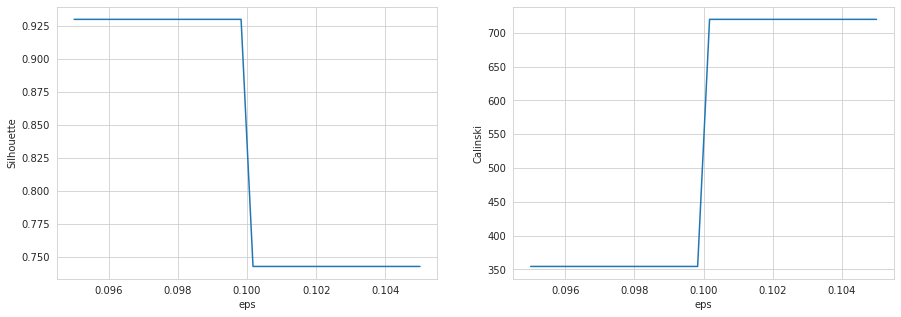

In [20]:
calcular_eps(data_caso2,30,0.095,0.105)

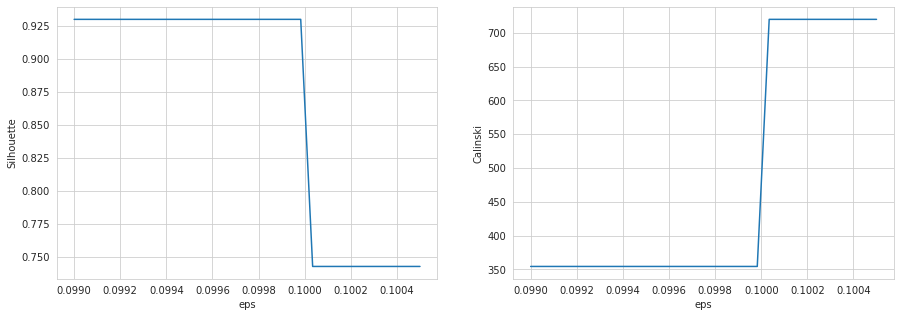

In [21]:
calcular_eps(data_caso2,30,0.099,0.1005)

In [64]:
resultado_db=dbscan(data_caso2,0.1)

Silhouette: 0.743859
Calinsky: 692.085703


In [59]:
clusters_db=pd.DataFrame(data_caso2)
clusters_db.columns=caso2.columns
clusters_db['labels']=resultado_db.labels_
centros_db=np.array(clusters_db.groupby('labels').mean())
clusters_db.head()

,tot_heridos_leves,tot_heridos_graves,tot_victimas,tot_muertos,tot_vehiculos_implicados,labels
0,0.285714,0.0,0.166667,0.000000,0.0,0
1,0.000000,0.0,0.000000,0.333333,0.1,1
2,0.142857,0.0,0.000000,0.000000,0.0,2
3,0.142857,0.0,0.000000,0.000000,0.1,2
4,0.142857,0.0,0.000000,0.000000,0.0,2


<AxesSubplot:>

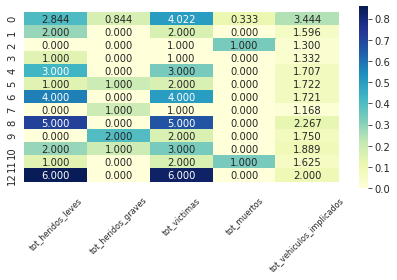

In [60]:
visualize_centroids(centros_db,np.array(caso2), caso2.columns)

<AxesSubplot:xlabel='labels', ylabel='count'>

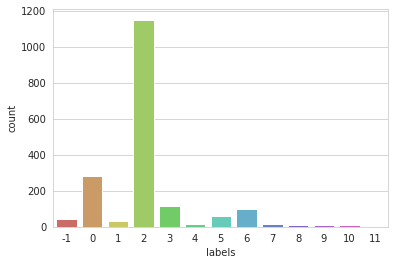

In [61]:
sns.countplot(data=clusters_db, x='labels',palette='hls')

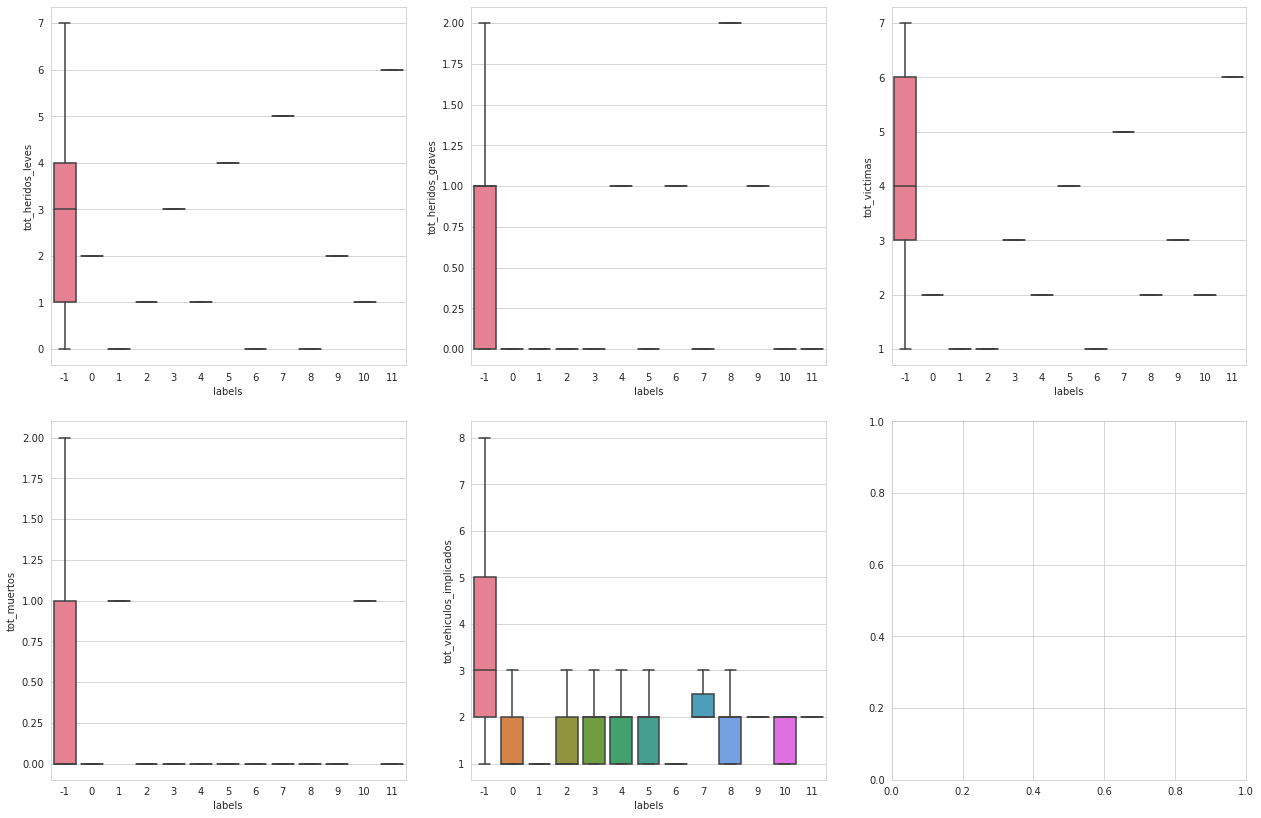

In [67]:
clusters_db=caso2.copy()
clusters_db['labels']=resultado_db.labels_
boxplot_clusters(clusters_db,False)

/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping de

/home/pilar/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


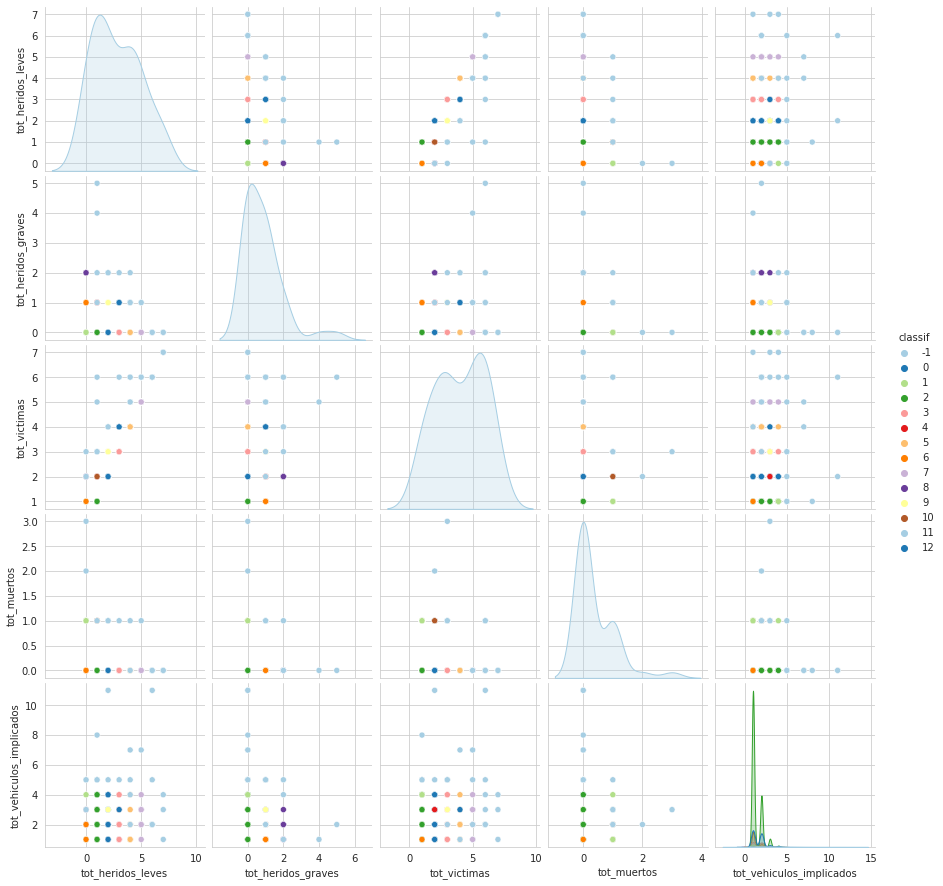

In [41]:
pairplot(caso2, caso2.columns, resultado_db.labels_)